In [58]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Load the numpy array with shape (2643, 17, 11)
# (term_num, time_steps, feature_num)

arr = pickle.load(open('output/gene_editing/result.array', mode='rb'))

# Because the data is spare in the first and last year,
# we truncated them
arr = arr[:, 1:-1, :]
print('Shape of the result array:', arr.shape)

Shape of the result array: (2643, 15, 12)


In [35]:
X, y = arr[:, :-1, :], arr[:, -1, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (2114, 14, 12)
Shape of X_test: (529, 14, 12)
Shape of y_train: (2114,)
Shape of y_test: (529,)


In [36]:
# Scale the input
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])).reshape(X_train.shape)
X_test_scaled = scaler.fit_transform(X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])).reshape(X_test.shape)
print('Shape of X_train_scaled:', X_train_scaled.shape)
print('Shape of X_test_scaled:', X_test_scaled.shape)

Shape of X_train_scaled: (2114, 14, 12)
Shape of X_test_scaled: (529, 14, 12)


In [68]:
# Calculate the class weight

cw = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
cw

array([0.89010526, 0.40037879, 2.60987654, 1.48873239, 3.08613139])

In [70]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64, input_shape=(14, 12), return_sequences=True))
model.add(keras.layers.LSTM(64))
model.add(keras.layers.Dense(32, activation='relu'))
# model.add(keras.layers.Dense(1, activation='relu'))
model.add(keras.layers.Dense(5, activation='softmax'))
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 14, 64)            19712     
_________________________________________________________________
lstm_14 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 165       
Total params: 54,981
Trainable params: 54,981
Non-trainable params: 0
_________________________________________________________________


In [71]:
history = model.fit(X_train_scaled, y_train, batch_size=8, epochs=20, validation_data=(X_test_scaled, y_test), class_weight=cw)

Train on 2114 samples, validate on 529 samples
Epoch 1/20
2114/2114 [==============================] - 14s 6ms/sample - loss: 1.3159 - acc: 0.5000 - val_loss: 1.3509 - val_acc: 0.5009
Epoch 2/20
2114/2114 [==============================] - 7s 3ms/sample - loss: 1.2409 - acc: 0.5241 - val_loss: 1.2291 - val_acc: 0.5482
Epoch 3/20
2114/2114 [==============================] - 9s 4ms/sample - loss: 1.1666 - acc: 0.5511 - val_loss: 1.2118 - val_acc: 0.5293
Epoch 4/20
2114/2114 [==============================] - 9s 4ms/sample - loss: 1.1158 - acc: 0.5799 - val_loss: 1.1479 - val_acc: 0.5217
Epoch 5/20
2114/2114 [==============================] - 9s 4ms/sample - loss: 1.0857 - acc: 0.5629 - val_loss: 1.0949 - val_acc: 0.5709
Epoch 6/20
2114/2114 [==============================] - 9s 4ms/sample - loss: 1.0602 - acc: 0.5842 - val_loss: 1.1602 - val_acc: 0.5331
Epoch 7/20
2114/2114 [==============================] - 9s 4ms/sample - loss: 1.0523 - acc: 0.5686 - val_loss: 1.1582 - val_acc: 0.5255


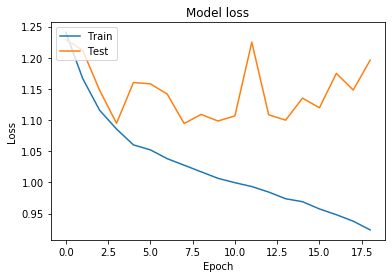

In [72]:
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

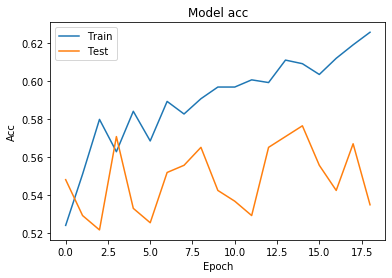

In [73]:
plt.plot(history.history['acc'][1:])
plt.plot(history.history['val_acc'][1:])
plt.title('Model acc')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test_scaled[:30]).argmax(axis=-1)
y_pred

In [ ]:
y_test[:30].astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = y_test.astype(int), y_pred = model.predict(X_test_scaled).argmax(axis=-1))
print(cm)

In [ ]:
y_test.astype(int).shape

In [ ]:
y_pred.shape

In [ ]:
from collections import Counter

c = Counter(y_test)
c

In [ ]:
c2 = Counter(y_train)
c2

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [ ]:
class_weights

In [ ]:
np.unique(y_train)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 3, 1, 1, 0, 1, 0, 1,
       4, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [43]:
y_test[:30].astype(int)

array([1, 1, 1, 1, 0, 4, 0, 3, 1, 0, 1, 1, 1, 1, 0, 2, 1, 3, 0, 1, 1, 4,
       4, 1, 1, 1, 1, 1, 2, 1])

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = y_test.astype(int), y_pred = model.predict(X_test_scaled).argmax(axis=-1))
print(cm)

[[ 57  57   0   2   1]
 [ 47 190   1  10   2]
 [  5  39   0   3   0]
 [ 11  37   0  25   0]
 [  5  14   0  12  11]]


In [47]:
y_test.astype(int).shape

(529,)

In [48]:
y_pred.shape

(30,)

In [50]:
from collections import Counter

c = Counter(y_test)
c

Counter({1.0: 250, 0.0: 117, 4.0: 42, 3.0: 73, 2.0: 47})

In [55]:
c2 = Counter(y_train)
c2

Counter({0.0: 475, 1.0: 1056, 2.0: 162, 3.0: 284, 4.0: 137})

In [56]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [57]:
class_weights

array([0.89010526, 0.40037879, 2.60987654, 1.48873239, 3.08613139])

In [59]:
np.unique(y_train)

array([0., 1., 2., 3., 4.])